# Review Model


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
%matplotlib inline # Plots show up in notebook
np.random.seed(7) # seeding random number generator

UsageError: unrecognized arguments: # Plots show up in notebook


In [11]:
df = pd.read_excel(r"C:\Users\User\Desktop\Akshay project\Flip robo\Amazon_review_master.xlsx")

In [12]:
df.head()

,products,title,rating,body,Reference,Type,Company,asins,Model,Webscraped by,Website,Website link
0,Yamaha YHT-1840 4K Ultra HD 5.1-Channel Home T...,Budget AV receiver struggling 4K passthrough!!,4,I got this for ₹27k in Amazon festival sale. C...,Yamaha Home Theatre,Home Theatre,Yamaha,B005PB2T01,YHT-1840,Akshay,Amazon,www.amazon.in
1,Yamaha YHT-1840 4K Ultra HD 5.1-Channel Home T...,WARRANTY VOID FOR ONLINE PURCHASE!!!,4,"First of all, don't buy Yamaha sound systems o...",Yamaha Home Theatre,Home Theatre,Yamaha,B01KH67HG3,YHT-1840,Akshay,Amazon,www.amazon.in
2,Yamaha YHT-1840 4K Ultra HD 5.1-Channel Home T...,Setup information to get dolby sound effect,5,Absolutely in this price segment it is a good ...,Yamaha Home Theatre,Home Theatre,Yamaha,B72HSF562A,YHT-1840,Akshay,Amazon,www.amazon.in
3,Yamaha YHT-1840 4K Ultra HD 5.1-Channel Home T...,Worth it,4,Yamaha looks good and solid. Connectivity is g...,Yamaha Home Theatre,Home Theatre,Yamaha,B00HSGANB6,YHT-1840,Akshay,Amazon,www.amazon.in
4,Yamaha YHT-1840 4K Ultra HD 5.1-Channel Home T...,Wrong AVR model sent | Warranty risk!!,2,Good quality amplifier but NO Bluetooth or Dol...,Yamaha Home Theatre,Home Theatre,Yamaha,B11HH624J8,YHT-1840,Akshay,Amazon,www.amazon.in


In [13]:
data = df.copy()
data.describe()
#Tried making a copy of the dataset I have optained

,rating
count,1108.000000
mean,3.738267
std,1.597790
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   products       1108 non-null   object
 1   title          1108 non-null   object
 2   rating         1108 non-null   int64 
 3   body           1108 non-null   object
 4   Reference      1108 non-null   object
 5   Type           1108 non-null   object
 6   Company        1108 non-null   object
 7   asins          1108 non-null   object
 8   Model          1108 non-null   object
 9   Webscraped by  1108 non-null   object
 10  Website        1108 non-null   object
 11  Website link   1108 non-null   object
dtypes: int64(1), object(11)
memory usage: 104.0+ KB


In [15]:
data["asins"].unique()
#checking ho my asins have been grouped along

array(['B005PB2T01', 'B01KH67HG3', 'B72HSF562A', 'B00HSGANB6',
       'B11HH624J8', 'B26GSBAJ54', 'B8JSH56G6A', 'B25GS8MD5G',
       'B12NAHS674', 'B00DGA12H5', 'B11MNFB5H3', 'B01BA5H8L1',
       'B11HM87GBA', 'B7VA6HS54G', 'B18NBA62B9', 'B98VSD1G2G',
       'B56GHAS12A', 'B3NM78ZX89'], dtype=object)

In [16]:
asins_unique = len(data["asins"].unique())
print("Number of Unique ASINs: " + str(asins_unique))

Number of Unique ASINs: 18


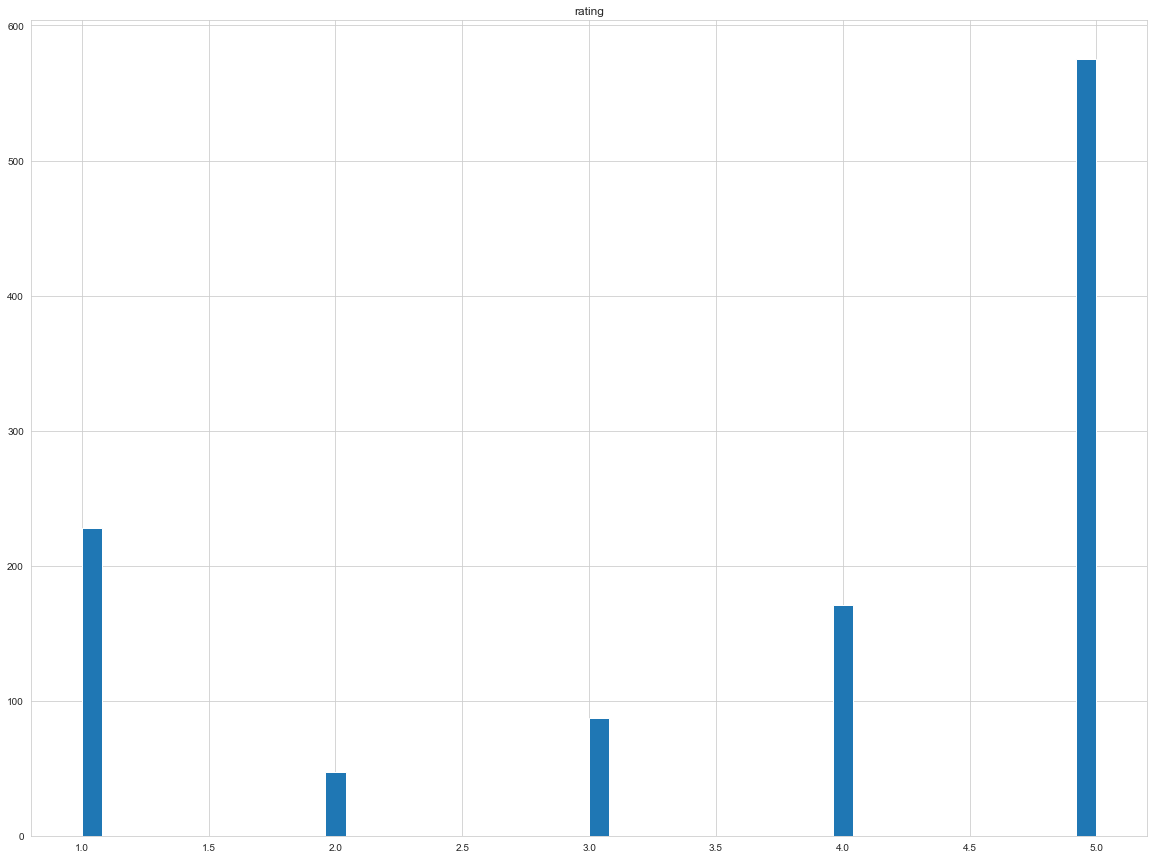

In [17]:
data.hist(bins=50, figsize=(20,15)) # builds histogram and set the number of bins and fig size (width, height)
plt.show()
#Checking how my dataset has been distributed along side of the graph

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["rating"]) # removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["rating"] = dataAfter["rating"].astype(int)

Before 1108
After 1108


In [19]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["rating"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

In [20]:
len(strat_train)

886

In [21]:
strat_train["rating"].value_counts()/len(strat_train) # value_count() counts all the values based on column

5    0.519187
1    0.205418
4    0.154628
3    0.077878
2    0.042889
Name: rating, dtype: float64

In [22]:
len(strat_test)

222

In [23]:

strat_test["rating"].value_counts()/len(strat_test)

5    0.518018
1    0.207207
4    0.153153
3    0.081081
2    0.040541
Name: rating, dtype: float64

In [24]:
reviews = strat_train.copy()
reviews.head(2)

,products,title,rating,body,Reference,Type,Company,asins,Model,Webscraped by,Website,Website link
191,Zebronics Wired Keyboard and Mouse Combo with ...,Good,3,Good,Zebronics Wired Keyboard and Mouse Combo,Wired Keyboard and Mouse,Zebronics,B01BA5H8L1,JUDWAA 750,Akshay,Amazon,www.amazon.in
127,Zebronics Wired Keyboard and Mouse Combo with ...,Best,5,Best in this price,Zebronics Wired Keyboard and Mouse Combo,Wired Keyboard and Mouse,Zebronics,B01KH67HG3,JUDWAA 750,Akshay,Amazon,www.amazon.in


In [25]:
len(reviews["products"].unique()), len(reviews["asins"].unique())

(13, 18)

In [26]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 191 to 637
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   products       886 non-null    object
 1   title          886 non-null    object
 2   rating         886 non-null    int32 
 3   body           886 non-null    object
 4   Reference      886 non-null    object
 5   Type           886 non-null    object
 6   Company        886 non-null    object
 7   asins          886 non-null    object
 8   Model          886 non-null    object
 9   Webscraped by  886 non-null    object
 10  Website        886 non-null    object
 11  Website link   886 non-null    object
dtypes: int32(1), object(11)
memory usage: 86.5+ KB


In [27]:
reviews.groupby("asins")["products"].unique()

asins
B005PB2T01    [Fire TV Stick Lite with Alexa Voice Remote Li...
B00DGA12H5    [Sony Bravia 164 cm (65 inches) 4K Ultra HD Sm...
B00HSGANB6    [Zebronics Wired Keyboard and Mouse Combo with...
B01BA5H8L1    [Zebronics Wired Keyboard and Mouse Combo with...
B01KH67HG3    [Zebronics Wired Keyboard and Mouse Combo with...
B11HH624J8    [Apple iPhone 13 Pro Max (256GB) - Graphite, Z...
B11HM87GBA    [Dyson V10 Absolute Cord-Free Vacuum Cleaner, ...
B11MNFB5H3    [Fire TV Stick Lite with Alexa Voice Remote Li...
B12NAHS674    [HP Ink Tank 415 WiFi Colour Printer, High Cap...
B18NBA62B9    [Fire TV Stick Lite with Alexa Voice Remote Li...
B25GS8MD5G    [Apple iPhone 13 Pro (128GB) - Silver, Zebroni...
B26GSBAJ54    [Apple iPhone 13 Pro (128GB) - Silver, Fire TV...
B3NM78ZX89    [Zebronics Wired Keyboard and Mouse Combo with...
B56GHAS12A    [Apple iPhone 13 Pro Max (256GB) - Graphite, S...
B72HSF562A    [Apple iPhone 13 Pro Max (256GB) - Graphite, S...
B7VA6HS54G    [Fire TV Stick Lite 

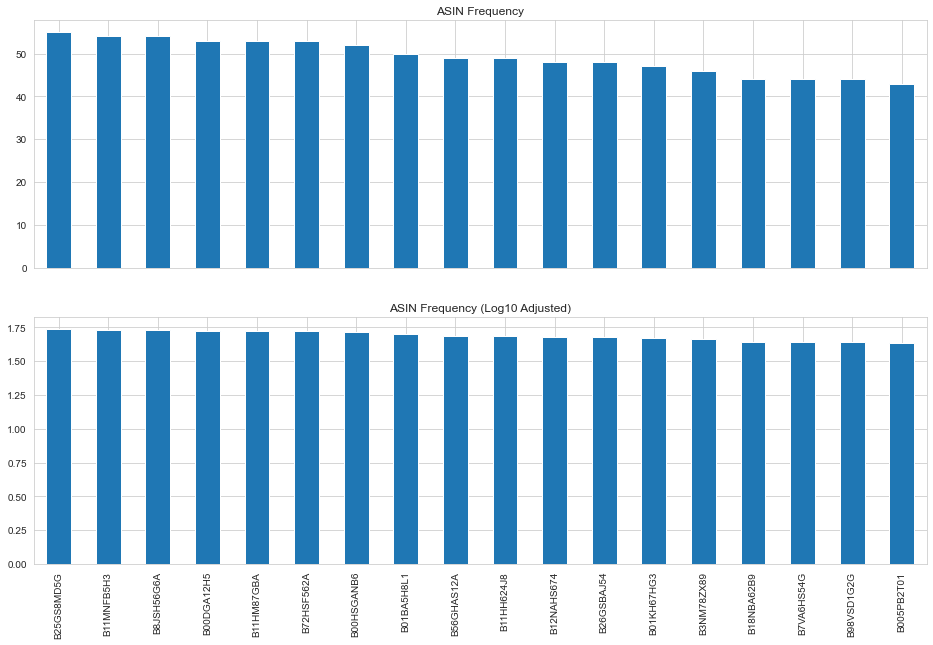

In [28]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2, title="ASIN Frequency (Log10 Adjusted)") 
plt.show()

In [29]:
# Entire training dataset average rating
reviews["rating"].mean()

3.739277652370203

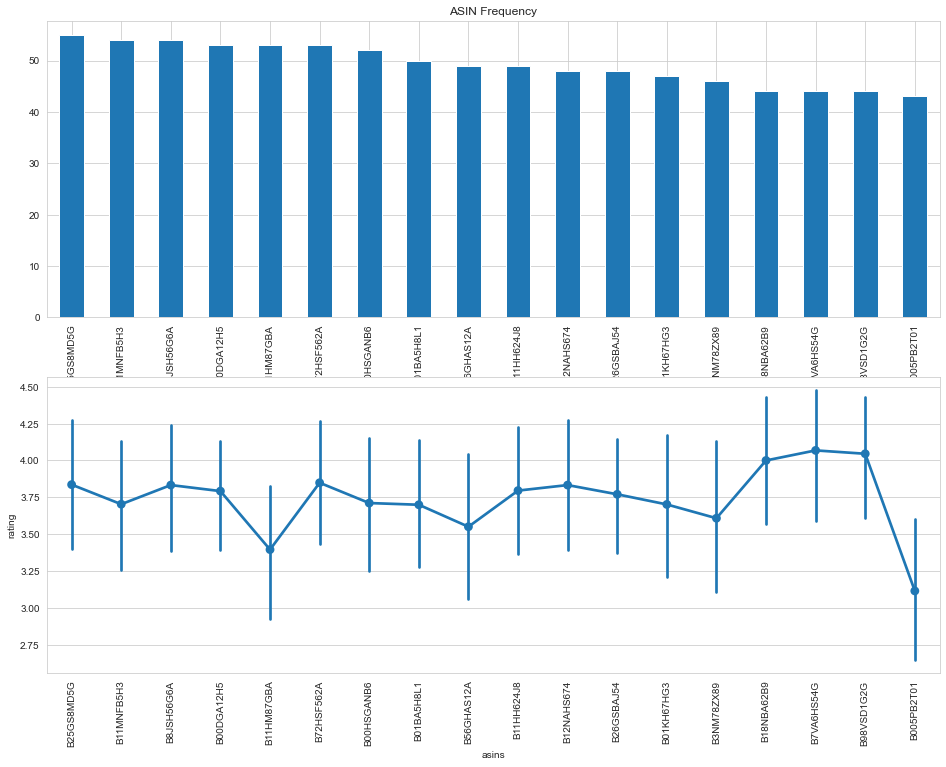

In [30]:
asins_count_ix = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

In [31]:
corr_matrix = reviews.corr()
corr_matrix
# Here we can analyze reviews.ratings with asins

,rating
rating,1.0


In [32]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 191 to 637
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   products       886 non-null    object
 1   title          886 non-null    object
 2   rating         886 non-null    int32 
 3   body           886 non-null    object
 4   Reference      886 non-null    object
 5   Type           886 non-null    object
 6   Company        886 non-null    object
 7   asins          886 non-null    object
 8   Model          886 non-null    object
 9   Webscraped by  886 non-null    object
 10  Website        886 non-null    object
 11  Website link   886 non-null    object
dtypes: int32(1), object(11)
memory usage: 126.5+ KB


In [33]:
counts = reviews["asins"].value_counts().to_frame()
counts.head()

,asins
B25GS8MD5G,55
B11MNFB5H3,54
B8JSH56G6A,54
B00DGA12H5,53
B11HM87GBA,53


In [34]:
avg_rating = reviews.groupby("asins")["rating"].mean().to_frame()
avg_rating.head()

,rating
asins,
B005PB2T01,3.116279
B00DGA12H5,3.792453
B00HSGANB6,3.711538
B01BA5H8L1,3.700000
B01KH67HG3,3.702128


In [35]:
table = counts.join(avg_rating)
table.head(30)

,asins,rating
B25GS8MD5G,55,3.836364
B11MNFB5H3,54,3.703704
B8JSH56G6A,54,3.833333
B00DGA12H5,53,3.792453
B11HM87GBA,53,3.396226
B72HSF562A,53,3.849057
B00HSGANB6,52,3.711538
B01BA5H8L1,50,3.700000
B56GHAS12A,49,3.551020
B11HH624J8,49,3.795918


,asins,rating
asins,1.000000,-0.024066
rating,-0.024066,1.000000


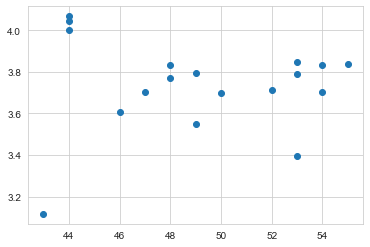

In [36]:
plt.scatter("asins", "rating", data=table)
table.corr()

In [37]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["rating"].apply(sentiments)
strat_train["Sentiment"][:20]

191      Neutral
127     Positive
958     Positive
662     Positive
161     Negative
1070    Positive
209      Neutral
515     Positive
114     Positive
320     Negative
444     Positive
159     Negative
1033    Positive
1013    Positive
202     Positive
532     Positive
912     Negative
640     Positive
612     Positive
894     Positive
Name: Sentiment, dtype: object

In [38]:
# Prepare data
X_train = strat_train["body"]
X_train_targetSentiment = strat_train["Sentiment"]
X_test = strat_test["body"]
X_test_targetSentiment = strat_test["Sentiment"]
print(len(X_train), len(X_test))

886 222


In [39]:
# Replace "nan" with space
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')

# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

(886, 4237)

In [40]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(886, 4237)

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

In [42]:
import numpy as np
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

0.6801801801801802

# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)

0.7882882882882883

# SVM

In [44]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)

0.8108108108108109

# Decission Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), 
                                  ("clf_decisionTree", DecisionTreeClassifier())])
clf_decisionTree_pipe.fit(X_train, X_train_targetSentiment)

predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == X_test_targetSentiment)

0.6756756756756757

# Random Forrest CLassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randomForest", RandomForestClassifier())])
clf_randomForest_pipe.fit(X_train, X_train_targetSentiment)

predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == X_test_targetSentiment)

0.7792792792792793

# Saving the best model

In [47]:
import pickle
ecommerce_model = 'finalized_model.pickle'
pickle.dump(clf_linearSVC_pipe,open(ecommerce_model,'wb'))